# U.S. Medical Insurance Costs

In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statistics
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/benjaminmcdaniel/Desktop/python-portfolio-project-starter-files/insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
#split the data set between smokers and non smokers and save as variables
non_smokers = df[df.smoker == 'no']
smokers = df[df.smoker == 'yes']
print(non_smokers.head())
print(smokers.head())

   age     sex     bmi  children smoker     region      charges
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
    age     sex    bmi  children smoker     region     charges
0    19  female  27.90         0    yes  southwest  16884.9240
11   62  female  26.29         0    yes  southeast  27808.7251
14   27    male  42.13         0    yes  southeast  39611.7577
19   30    male  35.30         0    yes  southwest  36837.4670
23   34  female  31.92         1    yes  northeast  37701.8768


In [7]:
#use univatiate statistics to describe the data
print(smokers.describe())
print(non_smokers.describe())

              age         bmi    children       charges
count  274.000000  274.000000  274.000000    274.000000
mean    38.514599   30.708449    1.113139  32050.231832
std     13.923186    6.318644    1.157066  11541.547176
min     18.000000   17.195000    0.000000  12829.455100
25%     27.000000   26.083750    0.000000  20826.244213
50%     38.000000   30.447500    1.000000  34456.348450
75%     49.000000   35.200000    2.000000  41019.207275
max     64.000000   52.580000    5.000000  63770.428010
               age          bmi     children       charges
count  1064.000000  1064.000000  1064.000000   1064.000000
mean     39.385338    30.651795     1.090226   8434.268298
std      14.083410     6.043111     1.218136   5993.781819
min      18.000000    15.960000     0.000000   1121.873900
25%      26.750000    26.315000     0.000000   3986.438700
50%      40.000000    30.352500     1.000000   7345.405300
75%      52.000000    34.430000     2.000000  11362.887050
max      64.000000    53

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64
The IQR for smokers is: 20192.9630625
The standard deviation for smokers is:  11520.466706529429
The variance for smokers is:  133207311.20634925
The skewness of smokers is:  0.12821727537875743
The range of smokers is:  50940.972910000004
The mode for smokers is:  ModeResult(mode=array([12829.4551]), count=array([1]))
The modality of smokers is: bimodal
The presence of outliers for smokers is: at the $60,000 mark


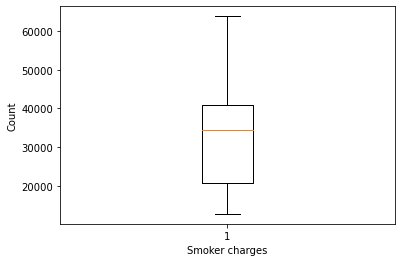

<Figure size 432x288 with 0 Axes>

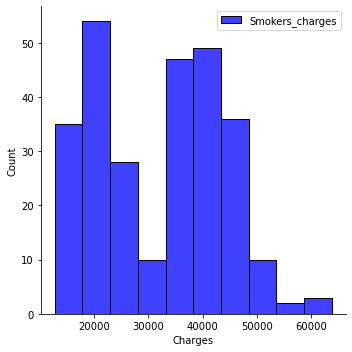

<Figure size 432x288 with 0 Axes>

In [54]:
#describe the distribution of a continuous variable center, spread, skew, modality, outliers. 
IQR_smokers_charges = stats.iqr(smokers.charges)
sigma_smokers_charges = np.std(smokers.charges)
var_smokers_charges = statistics.variance(smokers.charges, 32050.231832)
range_smokers_charges = smokers.charges.max() - smokers.charges.min()
print(smokers.charges.describe())
print('The IQR for smokers is:', IQR_smokers_charges)
print('The standard deviation for smokers is: ', sigma_smokers_charges )
print('The variance for smokers is: ', var_smokers_charges)
print('The skewness of smokers is: ', smokers.charges.skew())
print('The range of smokers is: ', range_smokers_charges )
print('The mode for smokers is: ', stats.mode(smokers.charges))
print('The modality of smokers is: bimodal')
print('The presence of outliers for smokers is: at the $60,000 mark')

plt.boxplot(smokers.charges)
plt.xlabel('Smoker charges')
plt.ylabel('Count')
plt.show()
plt.clf()
sns.displot(smokers.charges,color='blue', label="Smokers_charges")
plt.xlabel('Charges')
plt.ylabel('Count')
plt.legend()
plt.show()
plt.clf()

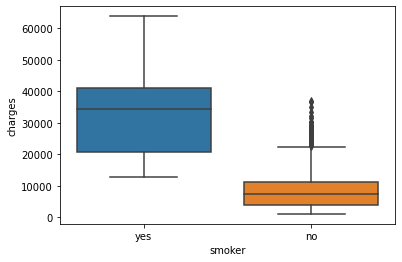

In [32]:
#side by side boxplot to inspect the charges between smokers and non_smokers
plt.clf()
sns.boxplot(data = df, x = 'smoker', y='charges')
plt.show()

In [18]:
#seperate the smokers data set into male and female 
smokers_male = smokers[smokers.sex == 'male']
smokers_female = smokers[smokers.sex == 'female']

<AxesSubplot:>

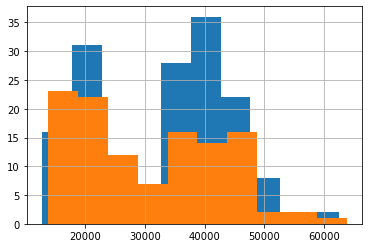

In [28]:
smokers_male.charges.hist()
smokers_female.charges.hist()


In [37]:
#run a t-test for mean comparison between charges for male and female smokers 95% confidence Alpha = .05 the data is not normally distributed. 
tstat, pval = stats.ttest_ind(smokers_male.charges, smokers_female.charges)
print(pval)

0.09447953030991117


In [46]:
#split the data for male smokers under 40 and male smokers above 40
sm_male_under40 = smokers_male[smokers_male.age < 40]
sm_male_over40 = smokers_male[smokers_male.age >= 40]


In [52]:
tstat, pval = stats.ttest_ind(sm_male_under40.charges, sm_male_over40.charges)
print(pval)

1.0047542750078352e-05


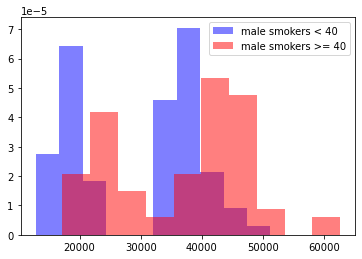

In [53]:
#plot an overlapping histogram to visualize the data for men who smoke over 40 vs under 40
plt.clf()
plt.hist(sm_male_under40.charges, color='blue', label = 'male smokers < 40', density=True, alpha=0.5)
plt.hist(sm_male_over40.charges, color='red', label = 'male smokers >= 40', density=True, alpha=0.5)
plt.legend()
plt.show()

In [47]:
#split the data for female smokers under 40 and female smokers over 40
sm_female_under40 = smokers_female[smokers_female.age < 40]
sm_female_over40 = smokers_female[smokers_female.age >= 40]

In [55]:
tstat, pval = stats.ttest_ind(sm_female_under40.charges, sm_female_over40.charges)
print(pval)

0.0021393866153821325


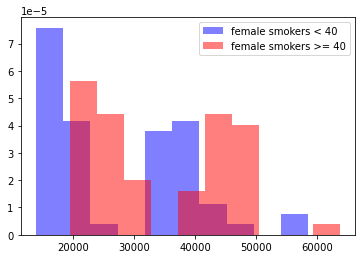

In [56]:
#plot an overlapping histogram to visualize the data for men who smoke over 40 vs under 40
plt.clf()
plt.hist(sm_female_under40.charges, color='blue', label = 'female smokers < 40', density=True, alpha=0.5)
plt.hist(sm_female_over40.charges, color='red', label = 'female smokers >= 40', density=True, alpha=0.5)
plt.legend()
plt.show()

In [4]:
#find the unique categories for region 
print(df.region.unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [5]:
#split the data set by region for future analysis
southwest = df[df.region == 'southwest']
southeast = df[df.region == 'southeast']
northwest = df[df.region == 'northwest']
northeast = df[df.region == 'northeast']


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

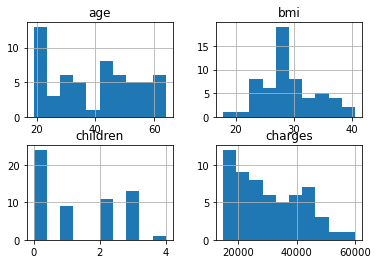

In [44]:
nws = northwest[northwest.smoker == 'yes']
nws.hist()

<AxesSubplot:xlabel='region'>

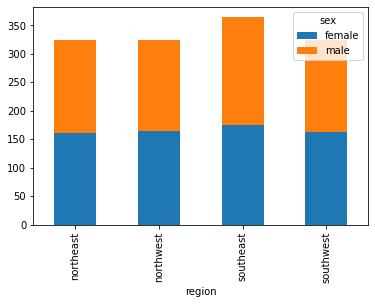

In [25]:
#construct a stacked bar chart for the variables region and sex
pd.crosstab(df['region'], df['sex']).plot(kind='bar', stacked=True)

In [6]:
#split the data set by sex for future analysis
men = df[df.sex == 'male']
women = df[df.sex == 'female']